In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/456.png",cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)

Output hidden; open in https://colab.research.google.com to view.

#Sharpening

In [5]:
#Define a Guassian Kernel
k = np.array([
    [-1,-2,-1],
    [-2,13,-2],
    [-1,-2,-1]
])

sharpening = cv2.filter2D(img1,-1,k)

In [6]:
#display image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.axis=('off')
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.title("Sharpening")
plt.imshow(cv2.cvtColor(sharpening,cv2.COLOR_BGR2RGB))
plt.axis=('off')

Output hidden; open in https://colab.research.google.com to view.

In [7]:


# sharpening = cv2.filter2D(img1,-1,k)

# Smoothing

In [29]:
class smooth():
  def __init__(self,img):
    self.img = img

  def avg(self):
    return cv2.blur(self.img,(5,5))
  def guas(self):
    return cv2.GaussianBlur(self.img,(5,5),0)
  def med(self):
    return cv2.medianBlur(self.img,5)

In [30]:
s = smooth(img1)
d = {"Average Blur":s.avg(),"Guassian Blur":s.guas(),"Median Blur":s.med()}

In [31]:
i=0
for k,v in d.items():
  i+=1
  plt.figure(figsize=(40,40))
  plt.subplot(4,4,i)
  plt.imshow(v)
  plt.title(k)

Output hidden; open in https://colab.research.google.com to view.

#Thershold

In [76]:
#convert image to gray

img_grey = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

thres = cv2.threshold(img_grey,150,230,cv2.THRESH_BINARY)[1]

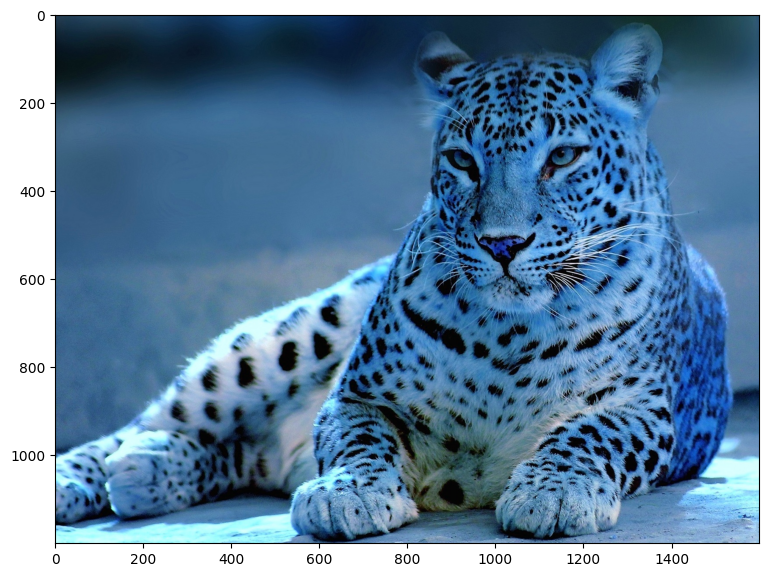

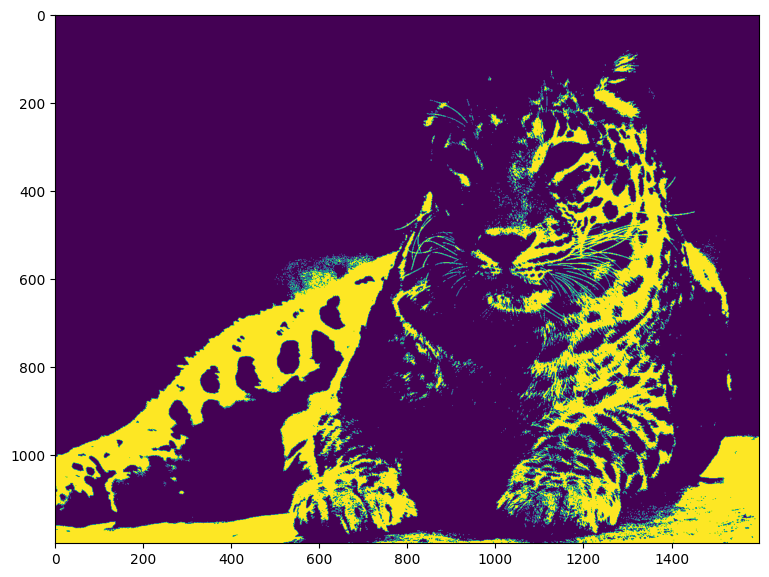

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.axis=('off')
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.imshow(thres)
plt.axis=('off')

#Histogram Equalization and Plot

Text(0.5, 1.0, 'Original image')

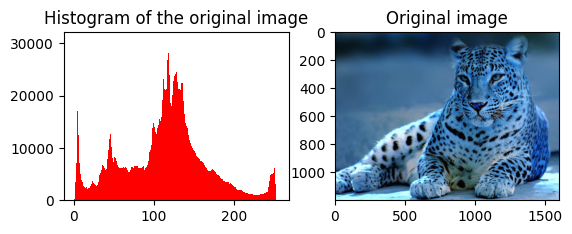

In [42]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Machine Vision/images_data/456.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
plt.subplot(221)
plt.hist(gray.flatten(), 256, [0, 256], color="r")
plt.title("Histogram of the original image")

plt.subplot(222)
plt.imshow(img, cmap="gray")
plt.title("Original image")

In [58]:
gray.shape

(1200, 1600)

In [59]:
equ = cv2.equalizeHist(gray)

In [60]:
equ.shape

(1200, 1600)

Text(0.5, 1.0, 'Equalized image')

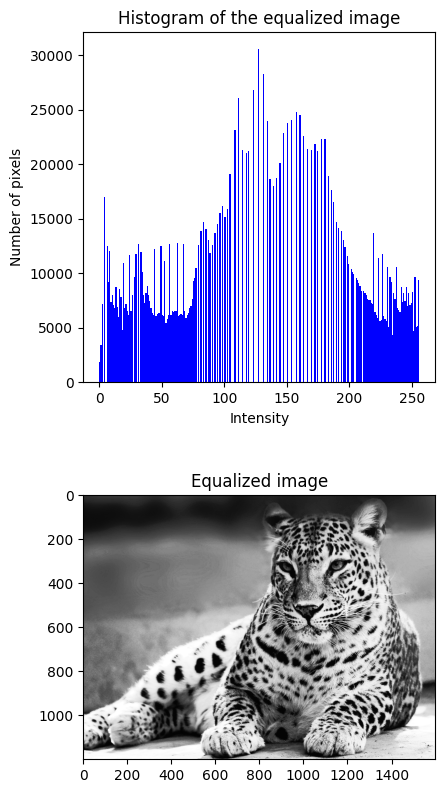

In [68]:
equ = cv2.equalizeHist(gray)

hist, bins = np.histogram(equ.flatten(), 256, [0, 256])

plt.figure(figsize=[10,10])

plt.subplot(222)
plt.hist(equ.flatten(), 256, [0, 256], color="b")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.title("Histogram of the equalized image")


plt.subplot(224)
plt.imshow(equ, cmap="gray")

plt.title("Equalized image")